# Simple Mortgage Calculator

Produces a financial model of a simple mortgage.

Attributes
* Interest
* Deposit
* Repayments
* Term

Inspired by https://mortgage.monster/


In [5]:


import numpy_financial as npf

# Entry values that don't change
deposit = 110000
property_value = 550000
interest_rate = 0.07
term = 30 # years

# Initial costs that are a part of the set up.
mortgage_costs = {
    "QLD": {
        "existing_building": {
            "stamp_duty": 22725,
            "mortgage_registration_fee": 197,
            "title_transfer_fee": 1973,
            "title_search": 20.45,
            "conveyancing": 2500
        }
    }
}

initial_cost_option = mortgage_costs['QLD']['existing_building']

loan_amount = property_value - deposit

print('Initial cost: ${:,.2f}'.format(sum(initial_cost_option.values(), deposit)))
print(f'Loan Amount: ${loan_amount:,.2f}')
print(f'Loan Value Ratio: {loan_amount/ property_value:.0%}')


Initial cost: $137,415.45
Loan Amount: $440,000.00
Loan Value Ratio: 80%


In [6]:
repayment_intervals = {
    'monthly': 12,
    'fortnightly': 26
}

repayment_interval = repayment_intervals['fortnightly']

repayment = npf.pmt(interest_rate/repayment_interval, repayment_interval*term, loan_amount)

print(f'Repayment per fortnight: {abs(repayment):,.2f}')


Repayment per fortnight: 1,350.45


In [7]:
weekly_rental_income = 500

# costs = {
#     {
#         'name': 'Rates',
#         'value': 800,
#         'frequency': 'quarterly'
#     }
# }



TypeError: imshow() missing 1 required positional argument: 'X'

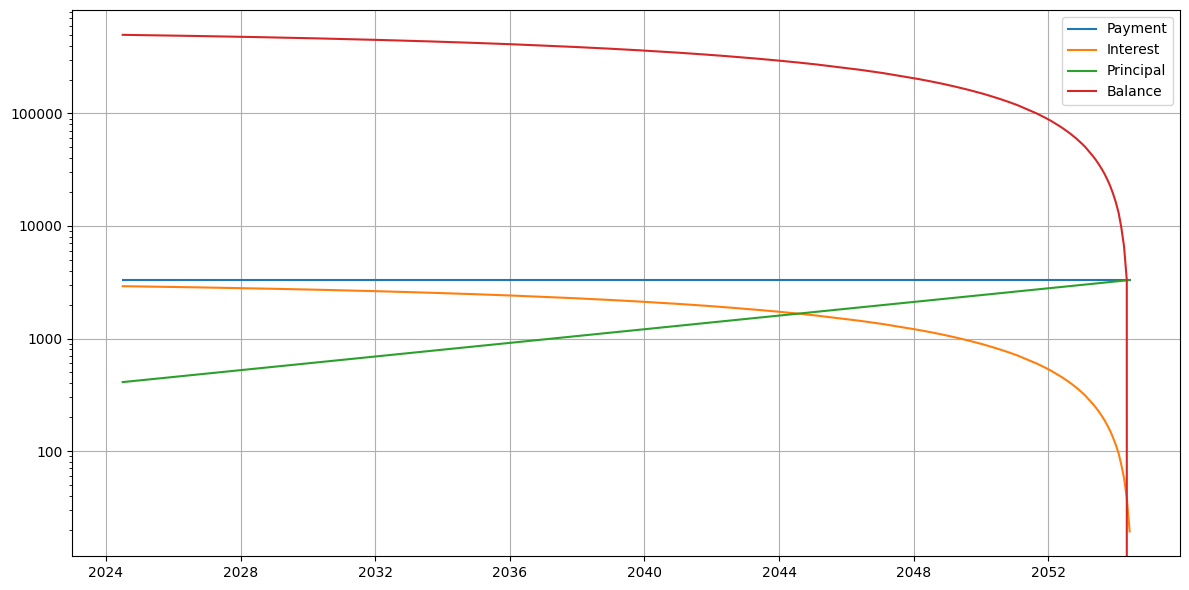

In [1]:



from lib.loans import Loan
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt


l = Loan(0.07, 30, 500000)
table = l.loan_table()


fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(table.index, table['Payment'], label='Payment')
ax.plot(table.index, table['Interest'], label='Interest')
ax.plot(table.index, table['Principal'], label='Principal')
ax.plot(table.index, table['Balance'], label='Balance')

ax.set_yscale('log')
ax.grid(True)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
# ax.yticks([1000, 5000, 10000, 250000, 500000])
ax.legend()



def on_mouse_move(event):
    print('tings')
    if not event.inaxes:
        return
    
    x_mouse, y_mouse = event.xdata, event.ydata
    line.set_label(f'Cursor: x={x_mouse:.2f}, y={y_mouse:.2e}')
    ax.legend()

fig.canvas.mpl_connect('motion_notify_event', on_mouse_move)

plt.tight_layout()
plt.show()


print(table)
l.summary()


